In [1]:
import matplotlib.pyplot as plot
import pandas as pd
import Regressions

# Import data_frame, with columns I want
df = pd.read_csv('Student_Performance.csv')
df = pd.get_dummies(df)

# Normalize the data
HS_Max = df['Hours Studied'].max()
PI_Max = df['Performance Index'].max()
PS_Max = df['Previous Scores'].max()
SQPP_Max = df['Sample Question Papers Practiced'].max()
SH_Max = df['Sleep Hours'].max()


df['Performance Index'] /= PI_Max
df['Hours Studied'] /= HS_Max
df['Previous Scores'] /= PS_Max
df['Sample Question Papers Practiced'] /= SQPP_Max
df['Sleep Hours'] /= SH_Max

# Trim Data so its reaedy for later
ratio = 0.75
split = int(ratio * len(df))
testing_df = df[split:]
learning_df = df[:split]
df.head()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,0.777778,1.000000,1.000000,0.111111,0.91,False,True
1,0.444444,0.828283,0.444444,0.222222,0.65,True,False
2,0.888889,0.515152,0.777778,0.222222,0.45,False,True
3,0.555556,0.525253,0.555556,0.222222,0.36,False,True
4,0.777778,0.757576,0.888889,0.555556,0.66,True,False


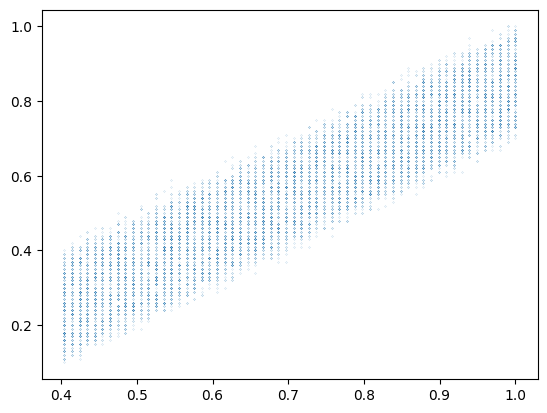

In [2]:
plot.scatter(df['Previous Scores'], df['Performance Index'], s=0.010)

In [3]:
'''Linear Regression'''
single_Feature_model = Regressions.Linear_Model(['Previous Scores'],'Performance Index')
single_Feature_model.Train_Model(learning_df, 500, 0.01)
print('Accuracy: ' + str(single_Feature_model.Test_Model(testing_df)))

Accuracy: 0.7984770495533151


In [4]:

'''Multiple Regression'''
multiple_Feature_Model = Regressions.Linear_Model(['Previous Scores', 'Sample Question Papers Practiced', 'Extracurricular Activities_No', 'Extracurricular Activities_Yes'], 'Performance Index')
multiple_Feature_Model.Train_Model(learning_df, 250, 0.1)
print('Accuracy: ' + str(multiple_Feature_Model.Test_Model(testing_df)))

Accuracy: 0.772962919128114


In [6]:
print( "Prediction:  " +  str(single_Feature_model.Predict([0.80])) )


Prediction:  0.6361722492219306
